<시작하세요! 텐서플로 2.0 프로그래밍> 예제코드입니다.

- 예제 코드를 실행하기 위해서는 [파일] > [드라이브에 사본 저장]으로 본인의 계정에 사본을 만든 다음 실행하면 됩니다.
- 예제 코드는 [깃허브 저장소](https://github.com/wikibook/tf2)에서도 동일하게 제공됩니다. 예제에 대한 질문이나 책에 대한 질문은 깃허브 저장소의 [Issues](https://github.com/wikibook/tf2/issues)에 올려주세요.
- 각 장의 예제 파일은 처음부터 끝까지 실행하는 상황을 가정하고 작성되었습니다. 혹시 세션이 다운되는 등의 이유로 실행이 되지 않는 경우가 있다면, 필요한 라이브러리를 import 하신 후에 실행하시면 됩니다. (tensorflow, numpy, pandas 등)

In [1]:
# 텐서플로 2 버전 선택
# try:
#     # %tensorflow_version only exists in Colab.
#     %tensorflow_version 2.x
# except Exception:
#     pass
import tensorflow as tf
print(tf.__version__)

2.10.0


In [2]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 9193145029777758557
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5840935321
locality {
  bus_id: 1
  links {
  }
}
incarnation: 18305803627405541055
physical_device_desc: "device: 0, name: GeForce RTX 2070, pci bus id: 0000:01:00.0, compute capability: 7.5"
xla_global_id: 416903419
]


In [1]:
!pip install tensorflow-gpu

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached python_version-0.0.2-py2.py3-none-any.whl (3.4 kB)
  Running setup.py clean for tensorflow-gpu
Failed to build tensorflow-gpu


  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [18 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "C:\Users\SW\AppData\Local\Temp\pip-install-ntsbpyg8\tensorflow-gpu_c4326b8846ad4b2686d488d93cf86c11\setup.py", line 37, in <module>
          raise Exception(TF_REMOVAL_WARNING)
      Exception:
      
      The "tensorflow-gpu" package has been removed!
      
      Please install "tensorflow" instead.
      
      Other than the name, the two packages have been identical
      since TensorFlow 2.1, or roughly since Sep 2019. For more
      information, see: pypi.org/project/tensorflow-gpu
      
      
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tensorflow-gpu
ERROR: Could not build w

# 6.2 주요 레이어 정리

In [3]:
# 그림 6.8 출력 코드. 참고 링크 : https://stackoverflow.com/a/37435090/2689257
import matplotlib.pyplot as plt

image_path = tf.keras.utils.get_file('cat.jpg', 'http://bit.ly/33U6mH9')
image = plt.imread(image_path)

titles = ['RGB Image', 'Red channel', 'Green channel', 'Blue channel']
cmaps = [None, plt.cm.Reds_r, plt.cm.Greens_r, plt.cm.Blues_r]

from numpy import array, zeros_like
def channel(image, color): #해당 칼러를 추출
    if color not in (0, 1, 2): return image
    c = image[..., color]
    z = zeros_like(c)
    return array([(c, z, z), (z, c, z), (z, z, c)][color]).transpose(1,2,0)
  

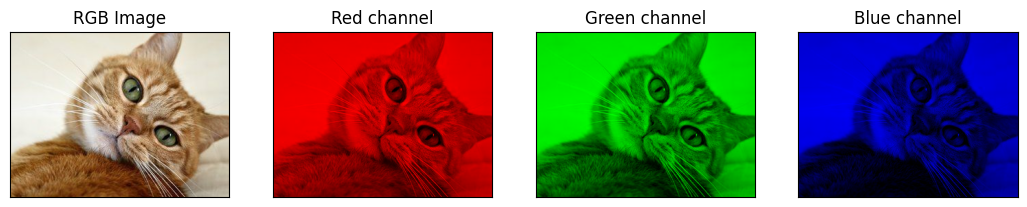

range(-1, 3)


In [4]:
colors = range(-1, 3)
fig, axes = plt.subplots(1, 4, figsize=(13,3))
objs = zip(axes, titles, colors)
# for i, j, k in objs:
#     print(i, j, k)
for ax, title, color in objs:
    ax.imshow(channel(image, color))
    ax.set_title(title)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()
print(colors)

In [5]:
# 6.1 Conv2D 레이어 생성 코드 - 필터는 가중치값의 행렬
conv1 = tf.keras.layers.Conv2D(kernel_size=(3,3),strides=(2,2),padding='same' ,filters=16)
# 필터가 합성곱층의 가중치 파라미터 W에 해당 > 학습단계에서 적절한 필터를 찾도록 학습

In [6]:
# 6.2 MaxPool2D 레이어 생성 코드 - 가중치가 없음  > 학습되지 않음
pool1 = tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2))

In [7]:
# 6.3 Dropout 레이어 생성 코드 - 가중치 없다 > 학습 없다
pool1 = tf.keras.layers.Dropout(rate=0.3)

# 6.3 Fashion MNIST with CNN

In [8]:
# http://taewan.kim/post/cnn/ > 컨볼루션 학습에 도움이 된다 
# https://wikidocs.net/62306
# https://89douner.tistory.com/57

# 6.4 Fashion MNIST 데이터셋 불러오기 및 정규화
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist
(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()

train_X = train_X / 255.0 # 정규화
test_X = test_X / 255.0

In [9]:
# 6.5 데이터를 채널을 가진 이미지 형태(3차원)으로 바꾸기
# reshape 이전
print(train_X.shape, test_X.shape)

train_X = train_X.reshape(-1, 28, 28, 1) # 흑백 채널 추가 - (60000, 28, 28, 1) 
test_X = test_X.reshape(-1, 28, 28, 1)

# reshape 이후
print(train_X.shape, test_X.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


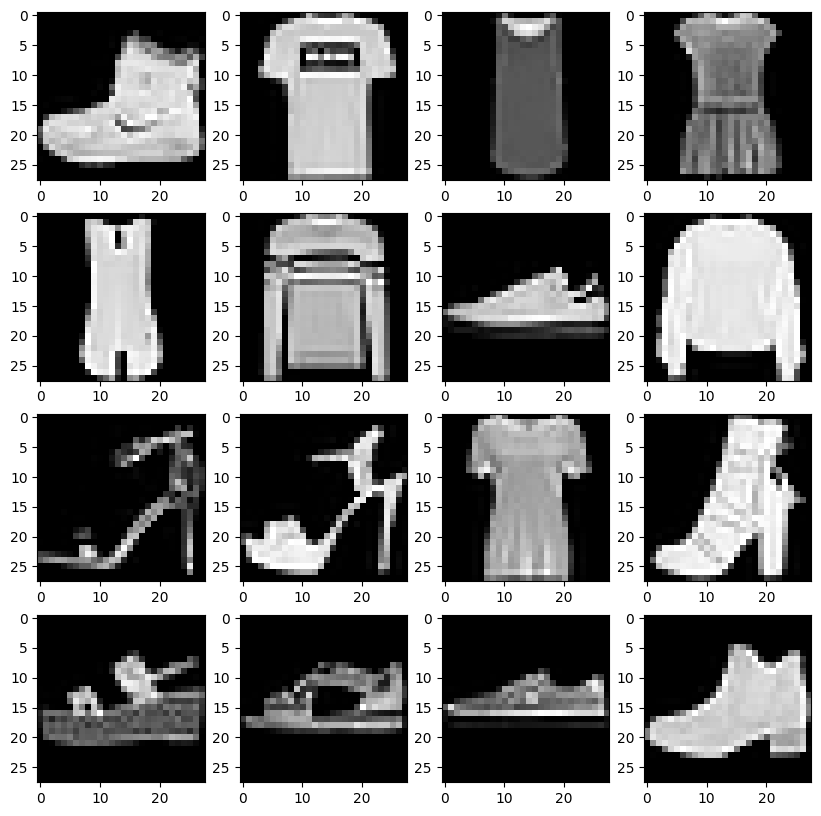

[9 0 0 3 0 2 7 2 5 5 0 9 5 5 7 9]


In [10]:
# 6.6 데이터 확인
import matplotlib.pyplot as plt
# 전체 그래프의 사이즈를 width=10, height=10 으로 지정합니다.
plt.figure(figsize=(10, 10))
for c in range(16):
    # 4행 4열로 지정한 grid 에서 c+1 번째의 칸에 그래프를 그립니다. 1~16 번째 칸을 채우게 됩니다.
    plt.subplot(4,4,c+1) # grid(4,4)에서 위 > 아래, 왼쪽 > 오른쪽 순서로 
    plt.imshow(train_X[c].reshape(28,28), cmap='gray') # reshape(28,28)로 3차원 데이터를 다시 2차원 데이터로 변환후 출력
    
plt.show()

# train 데이터의 첫번째 ~ 16번째 까지의 라벨을 프린트합니다.
print(train_Y[:16])

In [11]:
# 6.7 Fashion MNIST 분류 컨볼루션 신경망 모델 정의
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=16),# input_shape(28,28,1)은 이미지 높이, 너비, 채널 수
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=32),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64),
    tf.keras.layers.Flatten(),# 다차원 데이터를 1차원으로 정렬 
    tf.keras.layers.Dense(units=128, activation='relu'), # 분류기
    tf.keras.layers.Dense(units=10, activation='softmax') # 분류기 
])
# 경사하강법, 손실함수 
model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 32)        4640      
                                                                 
 conv2d_3 (Conv2D)           (None, 22, 22, 64)        18496     
                                                                 
 flatten (Flatten)           (None, 30976)             0         
                                                                 
 dense (Dense)               (None, 128)               3965056   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 3,989,642
Trainable params: 3,989,642
Non-

In [12]:
# 6.8 Google Colab GPU 사양 확인
!nvidia-smi

Wed Apr 26 17:30:20 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.89       Driver Version: 460.89       CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  GeForce RTX 2070   WDDM  | 00000000:01:00.0  On |                  N/A |
|  0%   48C    P2    41W / 175W |   6237MiB /  8192MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# 6.9 Fashion MNIST 분류 컨볼루션 신경망 모델 학습
history = model.fit(train_X, train_Y, epochs=25, validation_split=0.25)

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

# 손실 그래프 - val_loss는 증가하는 과적합 형태 보임
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
# 검증 정확도 val_accuracy는 학습이 진행될수록 감소 
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()
# 첫째 결과가 테스트 데이터의 loss, 두번째 결과가 테스트 데이터의 accuracy
model.evaluate(test_X, test_Y, verbose=0)

In [ ]:
# 6.10 Fashion MNIST 분류 컨볼루션 신경망 모델 정의 - 풀링 레이어, 드랍아웃 레이어 추가
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=32),
    tf.keras.layers.MaxPool2D(strides=(2,2)), # stride를 증가시킴
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=128),
    tf.keras.layers.Flatten(),# flatten 레이어 파라미터수가 30976 > 1152로 감소
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dropout(rate=0.3),# 과적합 개선에 기여
    tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()# 총 파라미터 숫자가 24만개로 감소

Epoch 1/25
1407/1407 [==============================] - 7s 5ms/step - loss: 0.5281 - accuracy: 0.8086 - val_loss: 0.3723 - val_accuracy: 0.8601
Epoch 2/25
1407/1407 [==============================] - 6s 4ms/step - loss: 0.3613 - accuracy: 0.8694 - val_loss: 0.3247 - val_accuracy: 0.8833
Epoch 3/25
1407/1407 [==============================] - 6s 5ms/step - loss: 0.3168 - accuracy: 0.8846 - val_loss: 0.3156 - val_accuracy: 0.8873
Epoch 4/25
1407/1407 [==============================] - 6s 4ms/step - loss: 0.2883 - accuracy: 0.8965 - val_loss: 0.2922 - val_accuracy: 0.8947
Epoch 5/25
1407/1407 [==============================] - 6s 4ms/step - loss: 0.2664 - accuracy: 0.9016 - val_loss: 0.2976 - val_accuracy: 0.8951
Epoch 6/25
1407/1407 [==============================] - 6s 5ms/step - loss: 0.2496 - accuracy: 0.9078 - val_loss: 0.3324 - val_accuracy: 0.8881
Epoch 7/25
1407/1407 [==============================] - 6s 4ms/step - loss: 0.2330 - accuracy: 0.9135 - val_loss: 0.3180 - val_accuracy:

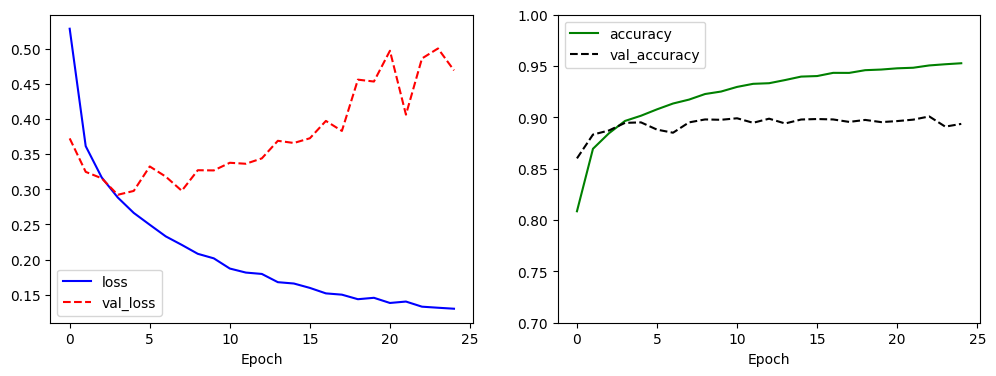

[0.4758216440677643, 0.8902000188827515]

In [15]:
# 6.11 Fashion MNIST 분류 컨볼루션 신경망 모델 학습 - 풀링 레이어, 드랍아웃 레이어 추가
history = model.fit(train_X, train_Y, epochs=25, validation_split=0.25)

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
# val_loss는 여전히 증가
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy') # 일정 수준에 머물다
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

model.evaluate(test_X, test_Y, verbose=0)# 정확도 89%

#6.4 퍼포먼스 높이기

In [17]:
# 6.12 VGGNet 스타일의 Fashion MNIST 분류 컨볼루션 신경망 모델 정의
# VGG-19 모델이 가장 깊은 레이어 구조 > 특징 추출기 초반에 컨볼루션 레이어 2개 + 풀링 1개를 반복 2차례
# VGG-7: 7은 컨볼루션 갯수와 Dense 갯수 의 합 
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=32, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=128, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=256, padding='valid', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model.summary() # 총 파라미터는 520만개 

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 conv2d_11 (Conv2D)          (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 conv2d_12 (Conv2D)          (None, 14, 14, 128)       73856     
                                                                 
 conv2d_13 (Conv2D)          (None, 12, 12, 256)       295168    
                                                      

In [ ]:
# 6.13 VGGNet 스타일의 Fashion MNIST 분류 컨볼루션 신경망 모델 학습
history = model.fit(train_X, train_Y, epochs=25, validation_split=0.25)

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
# val_loss가 증가하지 않는다
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
#정확도가 92.52%로 좋다
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

model.evaluate(test_X, test_Y, verbose=0)

Epoch 1/25
1407/1407 [==============================] - 85s 60ms/step - loss: 0.5807 - accuracy: 0.7882 - val_loss: 0.3393 - val_accuracy: 0.8758
Epoch 2/25
1407/1407 [==============================] - 166s 118ms/step - loss: 0.3694 - accuracy: 0.8694 - val_loss: 0.2754 - val_accuracy: 0.8987
Epoch 3/25
1407/1407 [==============================] - 165s 117ms/step - loss: 0.3254 - accuracy: 0.8847 - val_loss: 0.2418 - val_accuracy: 0.9102
Epoch 4/25
1407/1407 [==============================] - 163s 116ms/step - loss: 0.2998 - accuracy: 0.8923 - val_loss: 0.2462 - val_accuracy: 0.9090
Epoch 5/25
1407/1407 [==============================] - 166s 118ms/step - loss: 0.2864 - accuracy: 0.8973 - val_loss: 0.2423 - val_accuracy: 0.9102
Epoch 6/25
1407/1407 [==============================] - 156s 111ms/step - loss: 0.2769 - accuracy: 0.9013 - val_loss: 0.2152 - val_accuracy: 0.9185
Epoch 7/25
1212/1407 [========================>.....] - ETA: 21s - loss: 0.2643 - accuracy: 0.9049

In [ ]:
# 6.14 Image Augmentation 데이터 표시
# 이미지 보강은 훈련 데이터에 없는 이미지를 새롭게 만들어 훈련데이터를 보강하는 방법 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# 이 ImageDataGenerator 코드 부분은 다음 링크에서 참조했습니다. 
# https://github.com/franneck94/MNIST-Data-Augmentation/blob/master/mnist.py
# rotation, zoom, shift, flip 등을 지정합니다.
image_generator = ImageDataGenerator( # 훈련데이터의 표현력을 더 좋게 만드는 방법
            rotation_range=10,# 회전
            zoom_range=0.10,
            shear_range=0.5,#기울이거나
            width_shift_range=0.10,# 평행이동
            height_shift_range=0.10,
            horizontal_flip=True,#이미지를 가로로 뒤집다
            vertical_flip=False) # 이미지를 세로로 뒤집다

augment_size = 100
# flow()는 실제로 보강된 이미지를 생성
x_augmented = image_generator.flow(np.tile(train_X[0].reshape(28*28),100).reshape(-1,28,28,1),
                  np.zeros(augment_size), batch_size=augment_size, shuffle=False).next()[0]

# 새롭게 생성된 이미지 표시
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for c in range(100):
    plt.subplot(10,10,c+1)
    plt.axis('off')
    plt.imshow(x_augmented[c].reshape(28,28), cmap='gray')
plt.show()

In [ ]:
# 6.15 Image Augmentation
image_generator = ImageDataGenerator(
            rotation_range=10,
            zoom_range=0.10,
            shear_range=0.5,
            width_shift_range=0.10,
            height_shift_range=0.10,
            horizontal_flip=True,
            vertical_flip=False)

augment_size = 30000 #훈련 데이터의 50%인 30,000개의 이미지 추가를 위해 설정

randidx = np.random.randint(train_X.shape[0], size=augment_size) # 60,000 정수 중에서 30,000 정수를 랜덤하게 추출
# np.random.choice()로 대체 가능
# randidx는 임의 정수들의 넘파이 배열
x_augmented = train_X[randidx].copy() # 복사한다 
y_augmented = train_Y[randidx].copy()
x_augmented = image_generator.flow(x_augmented, np.zeros(augment_size), 
                      batch_size=augment_size, shuffle=False).next()[0]
print(train_X.shape)
# 원래 데이터인 x_train 에 Image Augmentation 된 x_augmented 를 추가합니다.
train_X = np.concatenate((train_X, x_augmented)) # 이미지 보강
train_Y = np.concatenate((train_Y, y_augmented))
#train_X가 여러번 반복하면 누적 증가되어 이해가 필요 
print(train_X.shape)

In [ ]:
# 6.16 VGGNet style 네트워크 + Image Augmentation 학습
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=32, padding='same',
                           activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=128, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=256, padding='valid', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

history = model.fit(train_X, train_Y, epochs=25, validation_split=0.25)

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()
#분류 정확도가 92.88으로 92.52보다 약간 증가
model.evaluate(test_X, test_Y, verbose=0)